# Simulation of $Pn^{-3}$ in adiabatic and non-adiabatic initial condition 

In [1]:
import numpy as np
import matplotlib

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import os
from scipy import special as sp
from scipy import stats
from scipy import optimize as op
import plasmapy.mathematics

%config InlineBackend.figure_format = 'svg'

## Parameters

In [50]:
k = 0.1
tem = 1
L = 2*np.pi/k
vmax = 5
nx = 501
nv = 501
dx = L/(nx-1)
dv = 2*vmax/(nv-1)
x = np.linspace(0, L, num=nx, endpoint=True)
v = np.linspace(-vmax, vmax, num=nv, endpoint=True)
V, X = np.meshgrid(v, x)
dt = 0.02
max_steps  = 2000
data_steps = 10
data_num = int(max_steps/data_steps) + 1
delta = 0.003
kappa = 0.0

path = '../data/'

m=1
n=1
q=1
v_th = np.sqrt(2*tem)
l_D = np.sqrt( tem) # $\lambda_D^2$
w_pe = 1
print("data_num = ",data_num)

data_num =  201


In [3]:
def eq4PDRM(w,k):
    wr,wi=w
    wc=complex(wr,wi)
    zeta = wc / k /v_th
    r = 1 + 1 / k**2 / l_D**2 * ( 1 + zeta*plasmapy.mathematics.plasma_dispersion_func(zeta) )
    return [r.real,r.imag]
print("k = ",k)
s=op.root(lambda w:eq4PDRM(w,k),[1,0.1])
v_p = s.x[0]/k
print("w_r      = ",s.x[0])
print("w_i      = ",s.x[1])
print("v_p      = ",v_p)

print("t_L      = ", abs(1/s.x[1]))
print('lim time =',2*np.pi/k/dv)
print('sim time = ', max_steps*dt)

k =  0.1
w_r      =  1.0151975255441656
w_i      =  -1.4805193642896697e-13
v_p      =  10.151975255441656
t_L      =  6754386495172.824
lim time = 1884.9555921538758
sim time =  40.0


## Definition & Loading Data

In [4]:
def fm(v, t):
    r = np.sqrt(1./(2.*np.pi*t))*np.exp(-v**2/(2*t))
    return r
def fk(v, t, kappa):
    if(kappa == 0):
        r = fm(v, t)
    else:
        r = np.sqrt(m/(2.*np.pi*t*kappa)) * sp.gamma(kappa+1.5) / \
            sp.gamma(kappa+1) * (1 + m*v**2 / kappa / 2 / t) ** (-kappa-1.5)
    return r
def ue(x):
    r = 1.+delta*np.cos(k*x)
    return r

In [51]:
progesses = np.arange(0,data_num,1)

f = []
phi = []

Tx0 = []
nx0 = []

for progess in progesses:
    f_temp = np.loadtxt(os.path.join(path,"data"+str(progess)))
    fx0_temp = f_temp[0,:]
    nx0_temp = np.sum(fx0_temp)*dv
    Tx0_temp = np.sum(v**2*fx0_temp)*dv/nx0_temp
    
    f.append(f_temp)
    Tx0.append(Tx0_temp)
    nx0.append(nx0_temp)
    
    phi_temp = np.loadtxt(os.path.join(path,"phi"+str(progess)))
    phi.append(phi_temp)

## Result

### Adiabatic initial condition

$$f = \frac{1}{\sqrt{2\pi}v_{th}} \exp[ {-\frac{v^2}{2v_{th}^2(1+\varepsilon \cos kx)^2}} ]$$

In [40]:
dataet = np.loadtxt(os.path.join(path, "tot_energy"))[0:max_steps]
dataep = np.loadtxt(os.path.join(path, "pot_energy"))[0:max_steps]
dataek = np.loadtxt(os.path.join(path, "kin_energy"))[0:max_steps]

t = np.linspace(0, max_steps, max_steps)

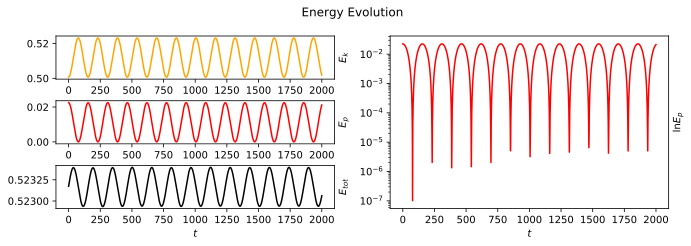

In [41]:
fig = plt.figure(figsize=(11, 3))

ax1 = plt.subplot2grid((3, 2), (0, 0))
ax1.plot(t, dataek, color='orange')
ax1.set_ylabel(r'$E_k$')
ax1.yaxis.set_label_position("right")

ax2 = plt.subplot2grid((3, 2), (1, 0))
ax2.plot(t, dataep, color='r')
ax2.set_ylabel(r'$E_p$')
ax2.yaxis.set_label_position("right")

ax3 = plt.subplot2grid((3, 2), (2, 0))
ax3.plot(t, dataet, color='black')
ax3.set_ylabel(r'$E_{tot}$')
ax3.set_xlabel(r'$t$')
ax3.yaxis.set_label_position("right")

axl2 = plt.subplot2grid((3, 2), (0, 1), rowspan=3)
axl2.plot(t, dataep, color='r')
axl2.set_ylabel(r'$\ln E_p$')
axl2.set_yscale('log')
axl2.yaxis.set_label_position("right")
axl2.set_xlabel(r'$t$')

fig.subplots_adjust(bottom=0.1, top=0.9, hspace=.5, wspace=.2)
fig.suptitle(r'Energy Evolution',va='bottom')

plt.show()

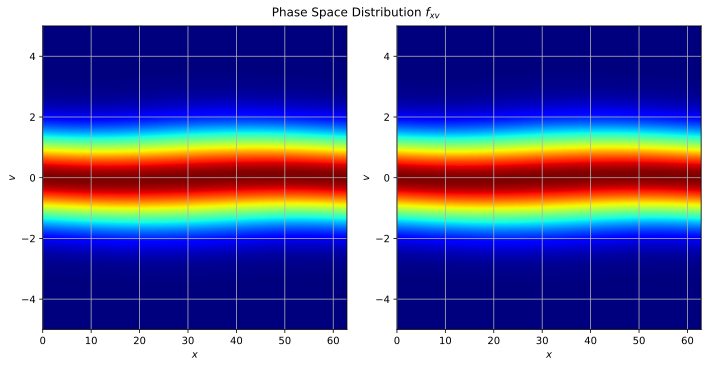

In [42]:
f_fig = plt.figure(figsize=(10,5))

extent_f = [0,L,-vmax,vmax]

ax1 = plt.subplot2grid((1,2),(0,0))
ax1.imshow(f[data_num-1].T,cmap=plt.cm.jet,interpolation='none',extent=extent_f,aspect='auto')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$v$')
ax1.grid()

ax2 = plt.subplot2grid((1,2),(0,1))
ax2.imshow(f[data_num-1].T,cmap=plt.cm.jet,interpolation='none',extent=extent_f,aspect='auto')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$v$')
ax2.grid()

f_fig.suptitle(r'Phase Space Distribution $f_{xv}$',va='bottom')
plt.tight_layout()
plt.show()

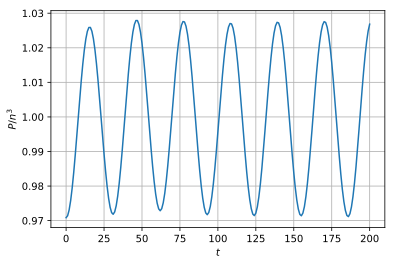

In [43]:
const = np.array(Tx0)/np.array(nx0)**3
plt.plot(const)
plt.xlabel(r'$t$')
plt.ylabel(r'$P/n^{3}$')
plt.grid()
plt.show()

### Non-adiabatic initial condition

$$f = \frac{1+\varepsilon \cos kx}{\sqrt{2\pi}v_{th}} \exp(-\frac{v^2}{2v_{th}^2})$$

In [52]:
dataet = np.loadtxt(os.path.join(path, "tot_energy"))[0:max_steps]
dataep = np.loadtxt(os.path.join(path, "pot_energy"))[0:max_steps]
dataek = np.loadtxt(os.path.join(path, "kin_energy"))[0:max_steps]

t = np.linspace(0, max_steps, max_steps)

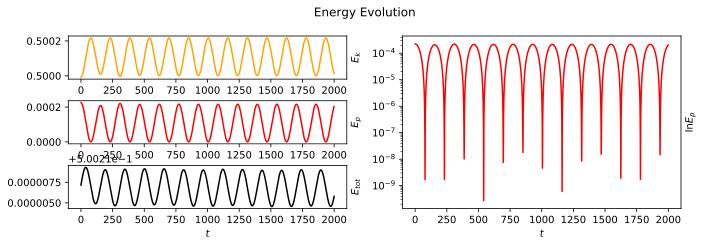

In [53]:
fig = plt.figure(figsize=(11, 3))

ax1 = plt.subplot2grid((3, 2), (0, 0))
ax1.plot(t, dataek, color='orange')
ax1.set_ylabel(r'$E_k$')
ax1.yaxis.set_label_position("right")

ax2 = plt.subplot2grid((3, 2), (1, 0))
ax2.plot(t, dataep, color='r')
ax2.set_ylabel(r'$E_p$')
ax2.yaxis.set_label_position("right")

ax3 = plt.subplot2grid((3, 2), (2, 0))
ax3.plot(t, dataet, color='black')
ax3.set_ylabel(r'$E_{tot}$')
ax3.set_xlabel(r'$t$')
ax3.yaxis.set_label_position("right")

axl2 = plt.subplot2grid((3, 2), (0, 1), rowspan=3)
axl2.plot(t, dataep, color='r')
axl2.set_ylabel(r'$\ln E_p$')
axl2.set_yscale('log')
axl2.yaxis.set_label_position("right")
axl2.set_xlabel(r'$t$')

fig.subplots_adjust(bottom=0.1, top=0.9, hspace=.5, wspace=.2)
fig.suptitle(r'Energy Evolution',va='bottom')

plt.show()

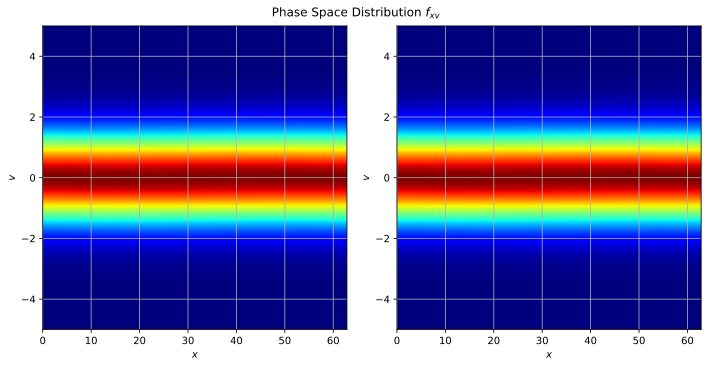

In [54]:
f_fig = plt.figure(figsize=(10,5))

extent_f = [0,L,-vmax,vmax]

ax1 = plt.subplot2grid((1,2),(0,0))
ax1.imshow(f[data_num-1].T,cmap=plt.cm.jet,interpolation='none',extent=extent_f,aspect='auto')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$v$')
ax1.grid()

ax2 = plt.subplot2grid((1,2),(0,1))
ax2.imshow(f[data_num-1].T,cmap=plt.cm.jet,interpolation='none',extent=extent_f,aspect='auto')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$v$')
ax2.grid()

f_fig.suptitle(r'Phase Space Distribution $f_{xv}$',va='bottom')
plt.tight_layout()
plt.show()

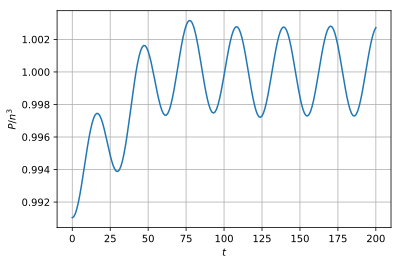

In [55]:
const = np.array(Tx0)/np.array(nx0)**3
plt.plot(const)
plt.xlabel(r'$t$')
plt.ylabel(r'$P/n^{3}$')
plt.grid()
plt.show()

## Collections

In [37]:
#pn3_k1_a = const

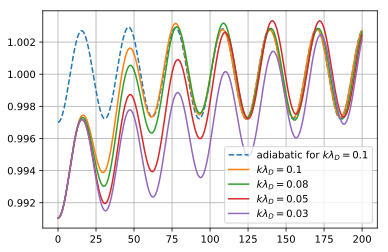

In [38]:
plt.plot(pn3_k1_a,'--',label=r'adiabatic for $k \lambda_D = 0.1$')
plt.plot(pn3_k1_na,label=r'$k \lambda_D = 0.1$')
plt.plot(pn3_k08_na,label=r'$k \lambda_D = 0.08$')
plt.plot(pn3_k05_na,label=r'$k \lambda_D = 0.05$')
plt.plot(pn3_k03_na,label=r'$k \lambda_D = 0.03$')
plt.grid()
plt.legend()
plt.show()